In [27]:
import sys
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy
#from config import API_KEY, gkey
from pprint import pprint
import gmaps
from scipy.stats import linregress

In [28]:
beer_reviews = pd.read_csv('../beer_reviews2.csv') #2 is more than 9 reviews
type(beer_reviews)
beer_reviews.head()
beer = beer_reviews.groupby(["beer_name_x","brewery_name","beer_style"]) #beer_name
beer_df = pd.DataFrame(beer.mean())
beer_df

,,,Unnamed: 0,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,review_count
beer_name_x,brewery_name,beer_style,,,,,,,,,,,
"""400"" Ale",Williamsburg AleWerks,American Brown Ale,6,14952.0,1.201561e+09,3.333333,3.833333,3.916667,3.750000,3.444444,NaN,36909.0,18.0
"""Hop Obama"" Ale",Sixpoint Brewery,American Amber / Red Ale,18,10607.0,1.219745e+09,4.160714,3.910714,4.071429,3.982143,4.160714,5.2,41650.0,28.0
"""Old Yeltsin"" Imperial Stout",Hoptown Brewing Company,Russian Imperial Stout,32,591.0,1.121746e+09,3.881818,4.090909,4.045455,4.009091,4.109091,9.0,2543.0,55.0
"""Shabadoo"" Black & Tan Ale",Berkshire Brewing Company Inc.,Black & Tan,35,33.0,1.203406e+09,3.991453,3.717949,3.893162,3.846154,3.901709,6.3,2369.0,117.0
"""The Wind Cried Mari..."" Scottish Heather Ale",Cambridge Brewing Company,Scottish Gruit / Ancient Herbed Ale,43,14.0,1.143164e+09,3.920000,4.160000,3.900000,3.880000,4.020000,4.4,5756.0,25.0
"""True Blue"" Blueberry Ale",Bar Harbor Brewing Company,Fruit / Vegetable Beer,46,347.0,1.247306e+09,3.710526,3.921053,3.842105,3.684211,3.605263,NaN,30518.0,19.0
# 100,NÃ¸gne Ã - Det KompromisslÃ¸se Bryggeri A/S,American Barleywine,48,7730.0,1.247535e+09,3.961009,4.013761,4.153670,4.084862,4.094037,10.0,25489.0,218.0
#'s Ale,Red Brick Brewing Company,English Bitter,49,864.0,1.244576e+09,3.897059,3.514706,3.867647,3.720588,3.705882,NaN,39408.0,34.0
#9,Magic Hat Brewing Company,Fruit / Vegetable Beer,59,96.0,1.215286e+09,3.539528,3.434466,3.501040,3.398058,3.396671,5.1,299.0,1442.0


In [29]:
br = beer_df #get it?

#print( br.loc[br['beer_abv'] >= 8, :])
#brewery_id	review_time	review_overall	review_aroma	review_appearance	review_palate	review_taste	beer_abv	beer_beerid

#x = list(range(0, len(df.index.tolist()), 1))
#y = df['Close']

#date_x = df.index

#fit = np.polyfit(x,y, 1)
#fit_fn = np.poly1d(fit)

#plt.plot(date_x, fit_fn(x), 'k-')
#plt.plot(date_x, y, 'go', ms=2)

In [30]:
#multiplelinear regression
#https://stackoverflow.com/questions/11479064/multiple-linear-regression-in-python
#from sklearn import linear_model
#clf = linear_model.LinearRegression()
#clf.fit([[getattr(t, 'x%d' % i) for i in range(1, 8)] for t in texts],
#        [t.y for t in texts])

In [31]:
#palate 
#ignore references to aroma


aroma = br[['review_palate','review_overall']] #review_overall
ar = pd.DataFrame(aroma)
ar.dropna()
xpalate = ar['review_palate']
aroma_min = xpalate.min()
aroma_max = xpalate.max()
yy = ar['review_overall']
xpalate = xpalate.tolist()
yy = yy.tolist()
palateRegress = linregress(xpalate,yy)
pr = palateRegress
print(pr)
p1 = pr[0]*aroma_min + pr[1]
print(p1)
p2 = pr[0]*aroma_max + pr[1]
print(p2)
#ar.head()

LinregressResult(slope=0.94038071312996807, intercept=0.29689544763370623, rvalue=0.92450178490773904, pvalue=0.0, stderr=0.0031335444904694114)
1.44624965236
4.81408137361


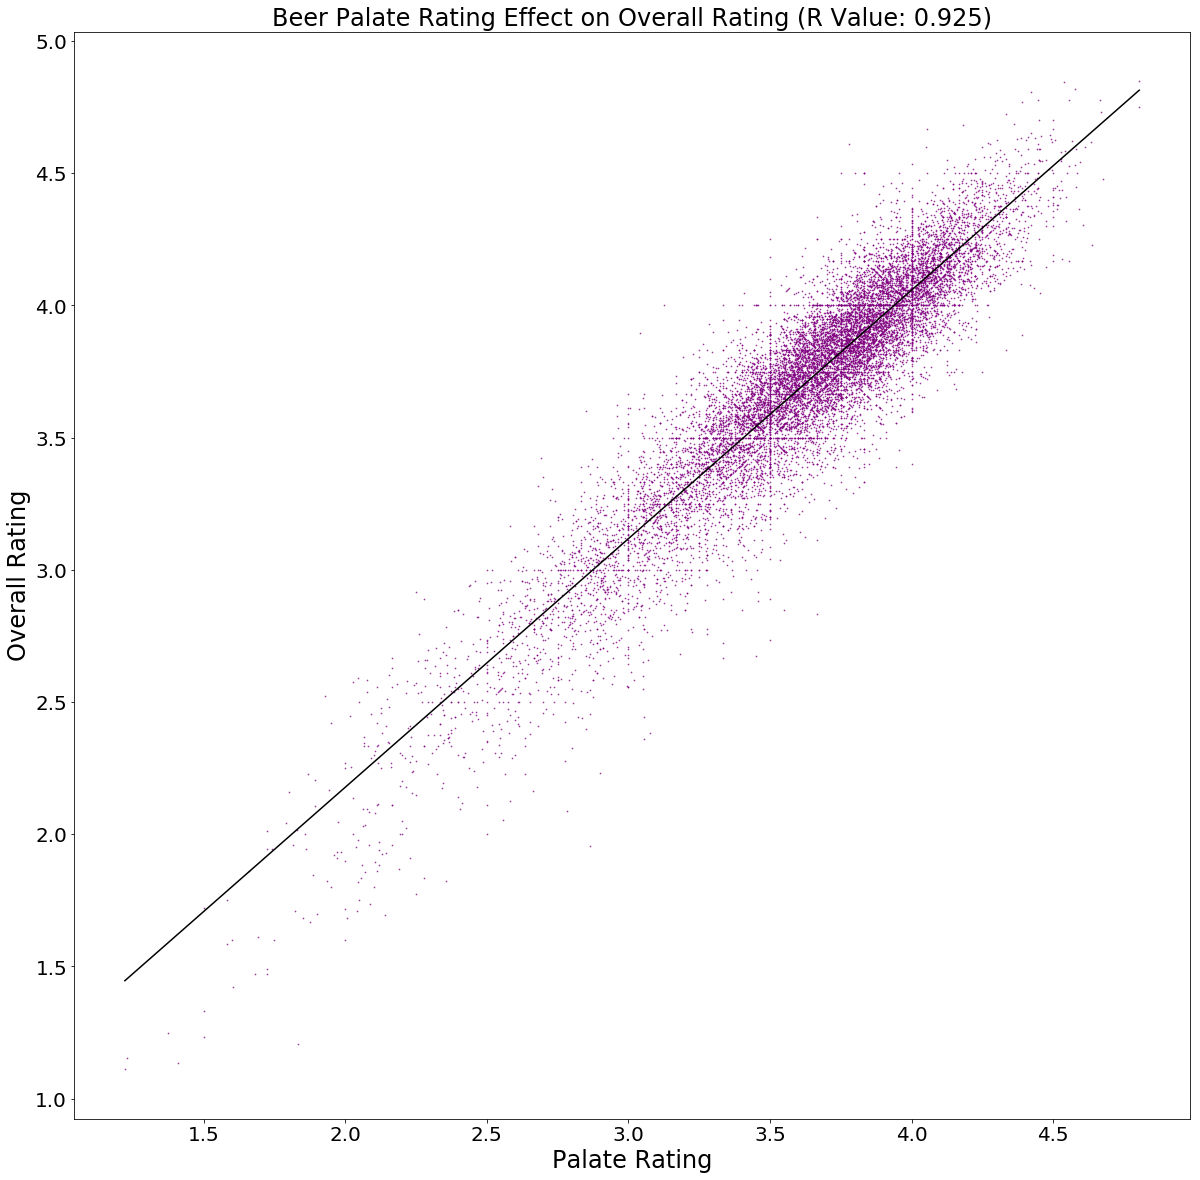

In [32]:
r = numpy.round(pr[2], 3)
plt.figure(figsize=(20,20))
plt.title(f'Beer Palate Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Palate Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_df.review_palate, beer_df.review_overall, s=.5, alpha=.7, color='purple')
#beer_df.plot.scatter('review_palate', 'review_overall', s=.1, alpha=.4, color='green')
#lt.plot([1,2,3,4,5], pr[1] + pr[0] * x,'-')
plt.plot([aroma_min,aroma_max],[p1,p2], 'k-')
plt.savefig('palate.png', bbox_inches="tight")
plt.show()

In [33]:
#aroma
#ignore references to aroma

aroma = br[['review_aroma','review_overall']]
ar = pd.DataFrame(aroma)
ar.dropna()
xaroma = ar['review_aroma']
aroma_min = xaroma.min()
aroma_max = xaroma.max()
yy = ar['review_overall']
xaroma = xaroma.tolist()
yy = yy.tolist()
aromaRegress = linregress(xaroma,yy) ###
ar = aromaRegress
print(ar)
a1 = ar[0]*aroma_min + ar[1]
print(a1)
a2 = ar[0]*aroma_max + ar[1]
print(a2)
#ar.head()

LinregressResult(slope=0.80033061106555448, intercept=0.81262633075753188, rvalue=0.8687232293991507, pvalue=0.0, stderr=0.0036877955214818362)
1.79080818855
4.68089095064


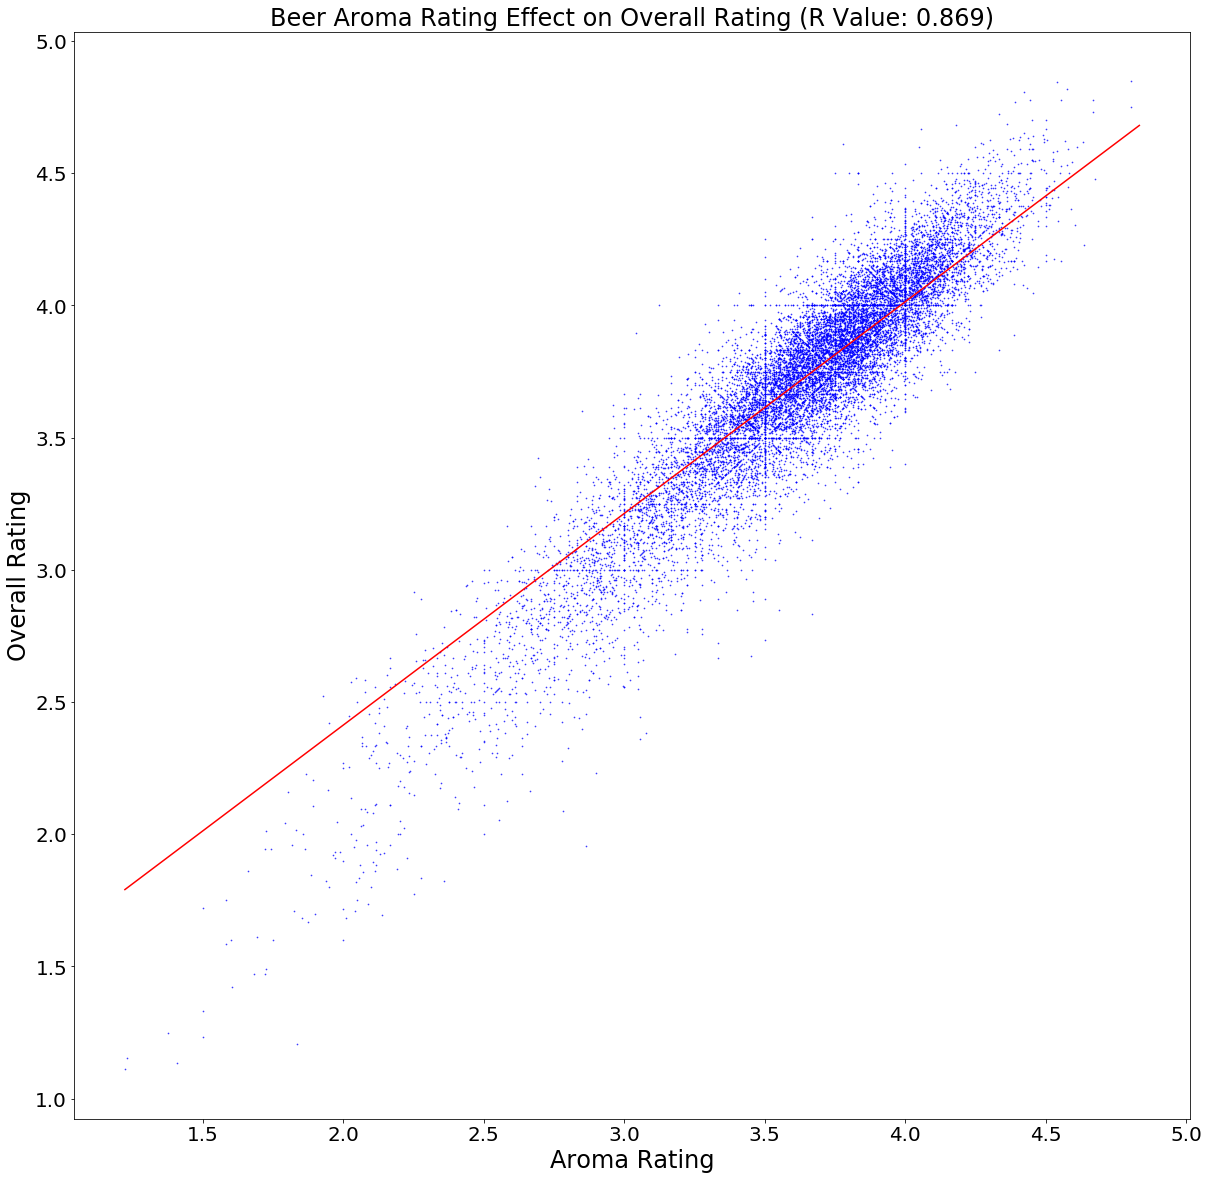

In [34]:
r = numpy.round(ar[2], 3)

plt.figure(figsize=(20,20))
plt.title(f'Beer Aroma Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Aroma Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_df.review_palate, beer_df.review_overall, s=.5, alpha=.7, color='blue')
#beer_df.plot.scatter('review_aroma', 'review_overall', s=.1, alpha=.4 )
plt.plot([aroma_min,aroma_max],[a1,a2], 'r-')
plt.savefig('aroma.png', bbox_inches="tight")
plt.show()

In [35]:
#appearance

appearance = br[['review_appearance','review_overall']]
ap = pd.DataFrame(appearance)
ap.dropna()

xappear = ap['review_appearance']
app_min = xappear.min()
app_max = xappear.max()
print(app_min)
print(app_max)
yy = ap['review_overall']
xappear = xappear.tolist()
yy = yy.tolist()
appearRegress = linregress(xappear,yy)
ar = appearRegress
a1 = ar[0]*app_min + ar[1]

a2 = ar[0]*app_max + ar[1]
print(p2)
print(ar)

1.222222222
4.722222222
4.81408137361
LinregressResult(slope=0.94016045254285285, intercept=0.19213590675416592, rvalue=0.82180396392337829, pvalue=0.0, stderr=0.0052680027452921118)


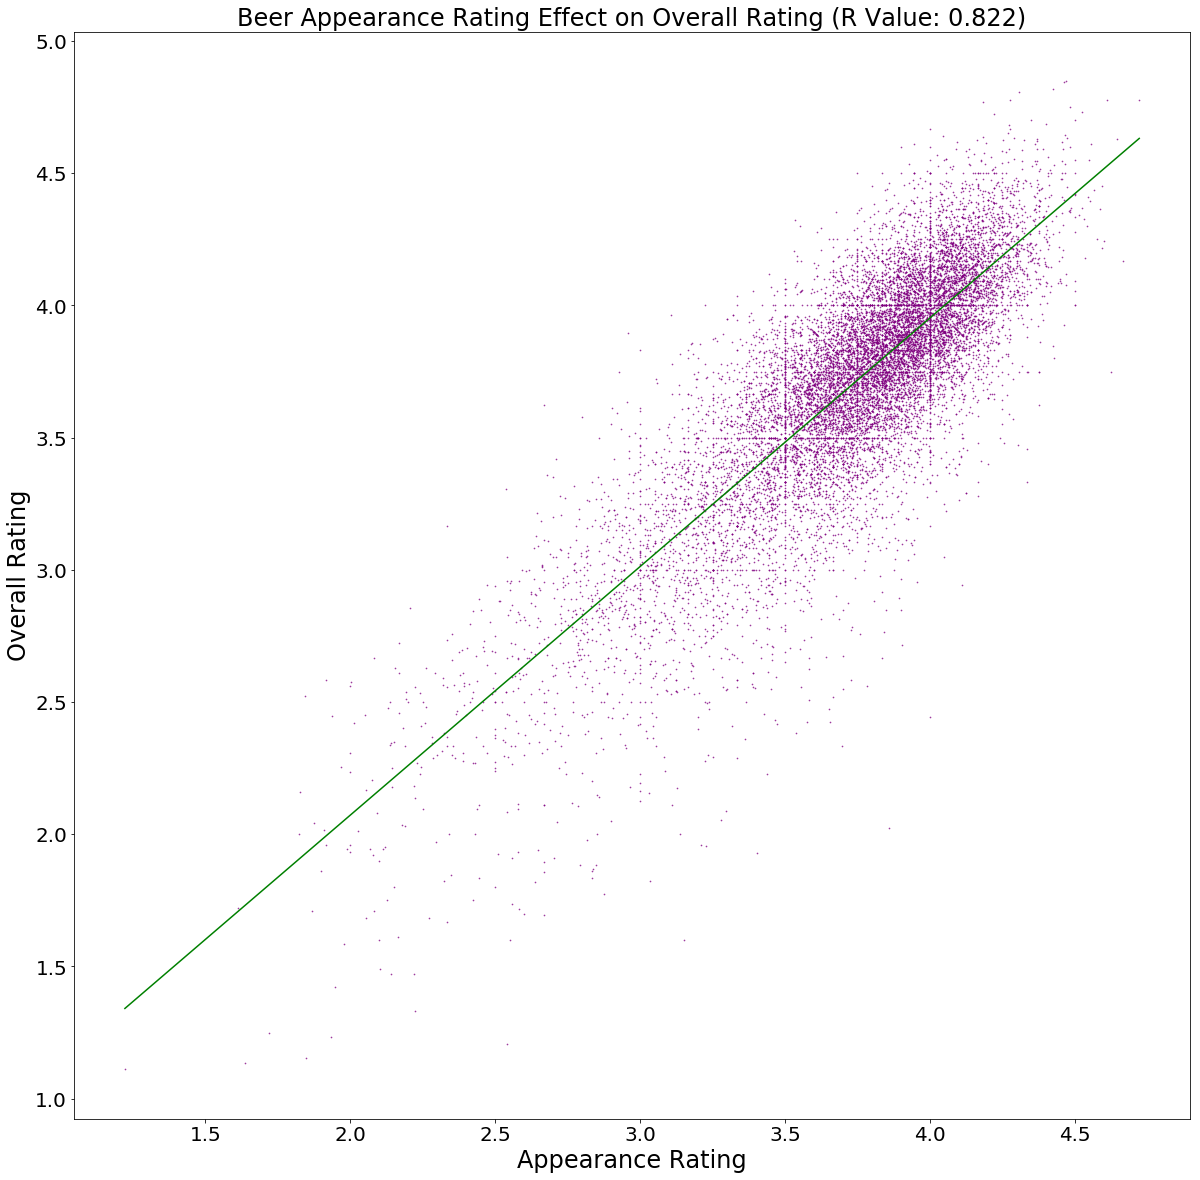

In [36]:
plt.figure(figsize=(20,20))
r = numpy.round(ar[2], 3)

plt.title(f'Beer Appearance Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Appearance Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_df['review_appearance'], beer_df['review_overall'], s=.5, alpha=.7, color='purple')
#beer_df.plot.scatter('review_appearance', 'review_overall', s=.1, alpha=.4, color='purple' )

plt.plot([app_min, app_max],[a1,a2], 'g-') #this way?
plt.savefig('appearance.png', bbox_inches="tight")

plt.show() 

In [37]:
#taste
taste = br[['review_taste','review_overall']]
ta = pd.DataFrame(taste)
ta.dropna()
xtaste = ta['review_taste']
taste_min = xtaste.min()
taste_max = xtaste.max()
yy = ta['review_overall']
xtaste = xtaste.tolist()
yy = yy.tolist()
tasteRegress = linregress(xtaste,yy)
tr = tasteRegress
print(tr)
t1 = tr[0]*taste_min + tr[1]
print(t1)
t2 = tr[0]*taste_max + tr[1]
print(t2)
#ar.head()

LinregressResult(slope=0.84916764276768963, intercept=0.60262798846413279, rvalue=0.94666701749435944, pvalue=0.0, stderr=0.0023358898870289137)
1.54614759144
4.78314561433


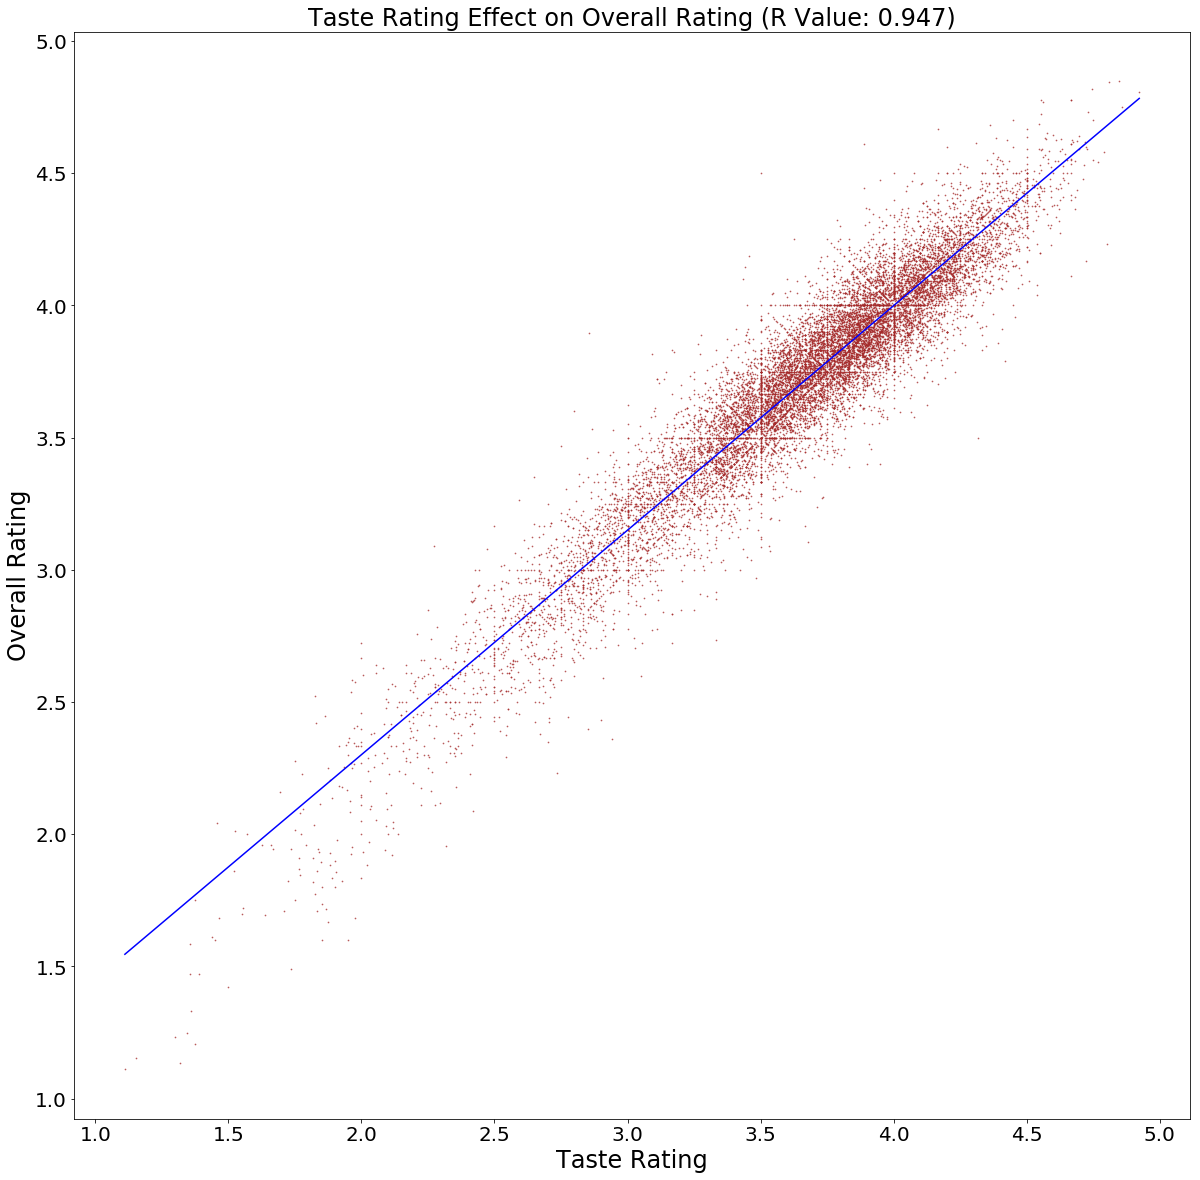

In [38]:
plt.figure(figsize=(20,20))
r = numpy.round(tr[2], 3)
plt.title(f'Taste Rating Effect on Overall Rating (R Value: {r})', fontsize=24)
plt.xlabel('Taste Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(beer_df.review_taste, beer_df.review_overall, s=.5, alpha=.7, color='brown')
#beer_df.plot.scatter('review_taste', 'review_overall',s=.1, alpha=.4, color='brown' )
#plt.xlim(0,6)
#plt.ylim(0,6)
plt.plot([taste_min, taste_max],[t1,t2],'b-')
plt.savefig('taste.png', bbox_inches="tight")
plt.show()

In [39]:
#abv
abv = br[['beer_abv','review_overall']]
abv = pd.DataFrame(abv)
abv = abv.dropna()
xabv = abv['beer_abv']

x1 = xabv.min()
x2 = xabv.max()
yy = abv['review_overall']
xabv = xabv.tolist()
#print(xabv)
yy = yy.tolist()
abvRegress = linregress(xabv,yy)
abvr = abvRegress
print(abvr)
abv1 = abvr[0]*x1 + abvr[1]
print(abv1)
abv2 = abvr[0]*x2 + abvr[1]
print(abv2)
#ar.head()

LinregressResult(slope=0.045418052096027318, intercept=3.4205507109210744, rvalue=0.23969793796362818, pvalue=6.0141509158128572e-179, stderr=0.0015687866345620834)
3.42282161353
5.28269084686


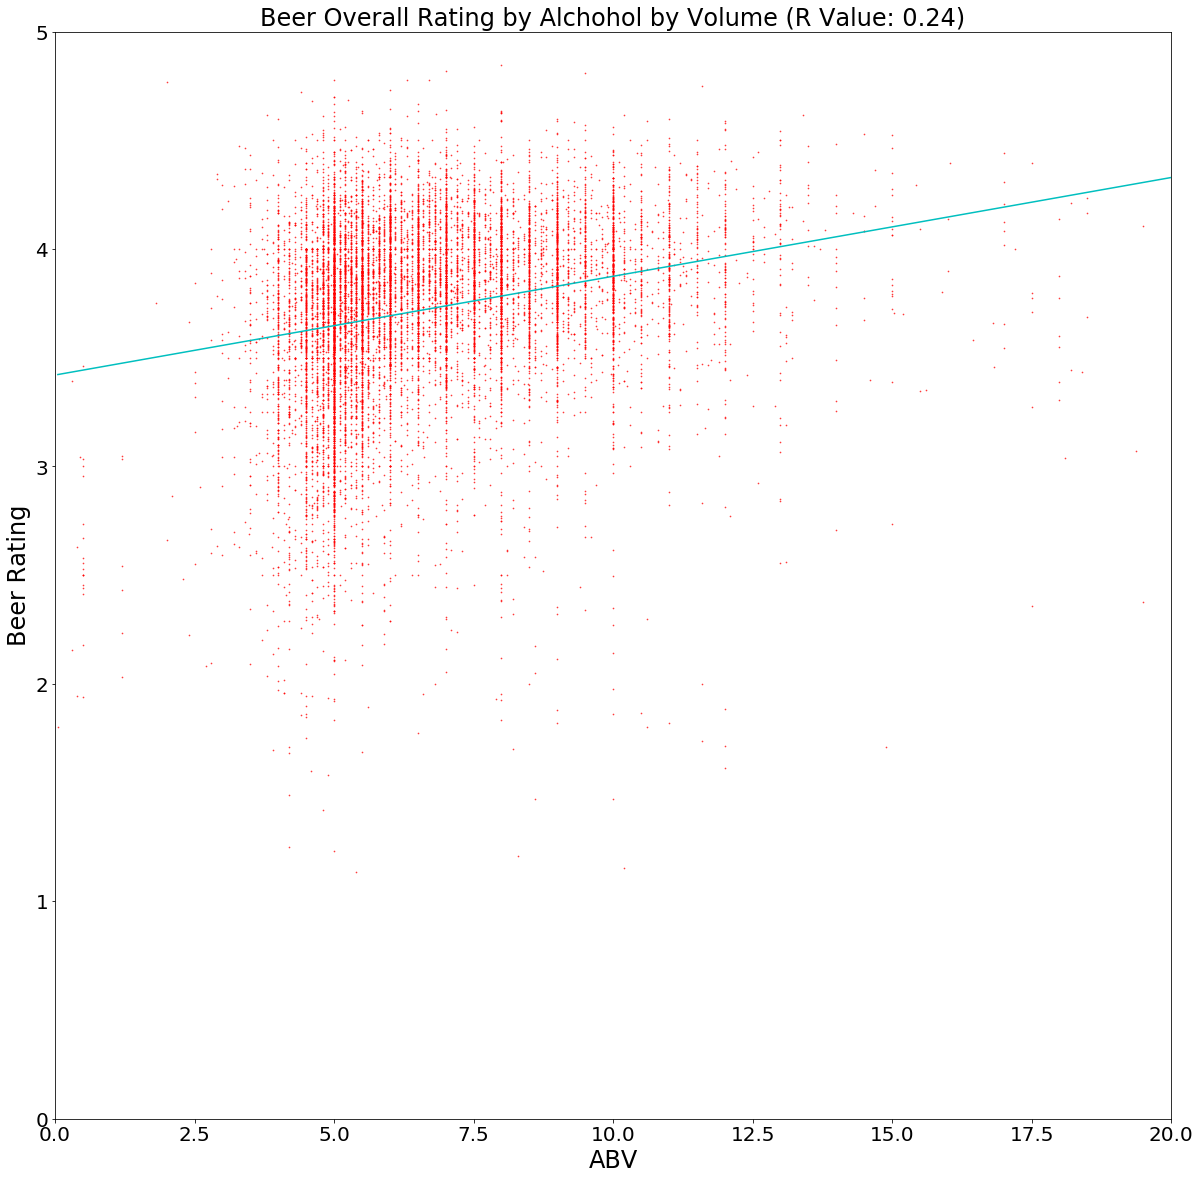

In [40]:
plt.figure(figsize=(20,20))
r = numpy.round(abvr[2], 3)
plt.scatter(beer_df.beer_abv, beer_df.review_overall, s=.5, alpha=.7, color='red' )
plt.title(f'Beer Overall Rating by Alchohol by Volume (R Value: {r})', fontsize=24)
plt.xlabel('ABV', fontsize=24)
plt.ylabel('Beer Rating', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot([x1,x2] ,[abv1,abv2], 'c-')
plt.xlim(0,20)
plt.ylim(0,5)
plt.savefig('abv.png', bbox_inches="tight")
plt.show()